In [1]:
import pandas as pd
import numpy as np
from html import unescape
import re

In [3]:
df = pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/recommended/book.csv", encoding='ISO-8859-1')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
# Decode HTML entities in 'Book.Title' column
df['Book.Title'] = df['Book.Title'].apply(unescape)

In [5]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [6]:
# Remove inappropriate characters from column names
df.columns = df.columns.str.replace('[^\w\s]', '')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


<Axes: xlabel='Book.Rating'>

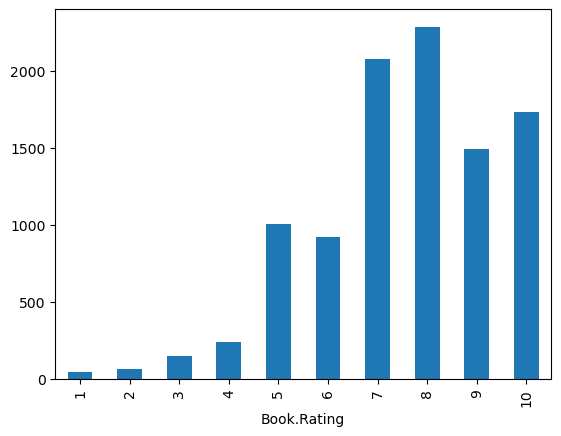

In [37]:
# Plotting the rating in the barplot
df['Book.Rating'].value_counts().sort_index().plot(kind='bar')

C:\Users\Rehaman shaik\AppData\Local\Temp\ipykernel_19508\1106982546.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Book.Rating"])


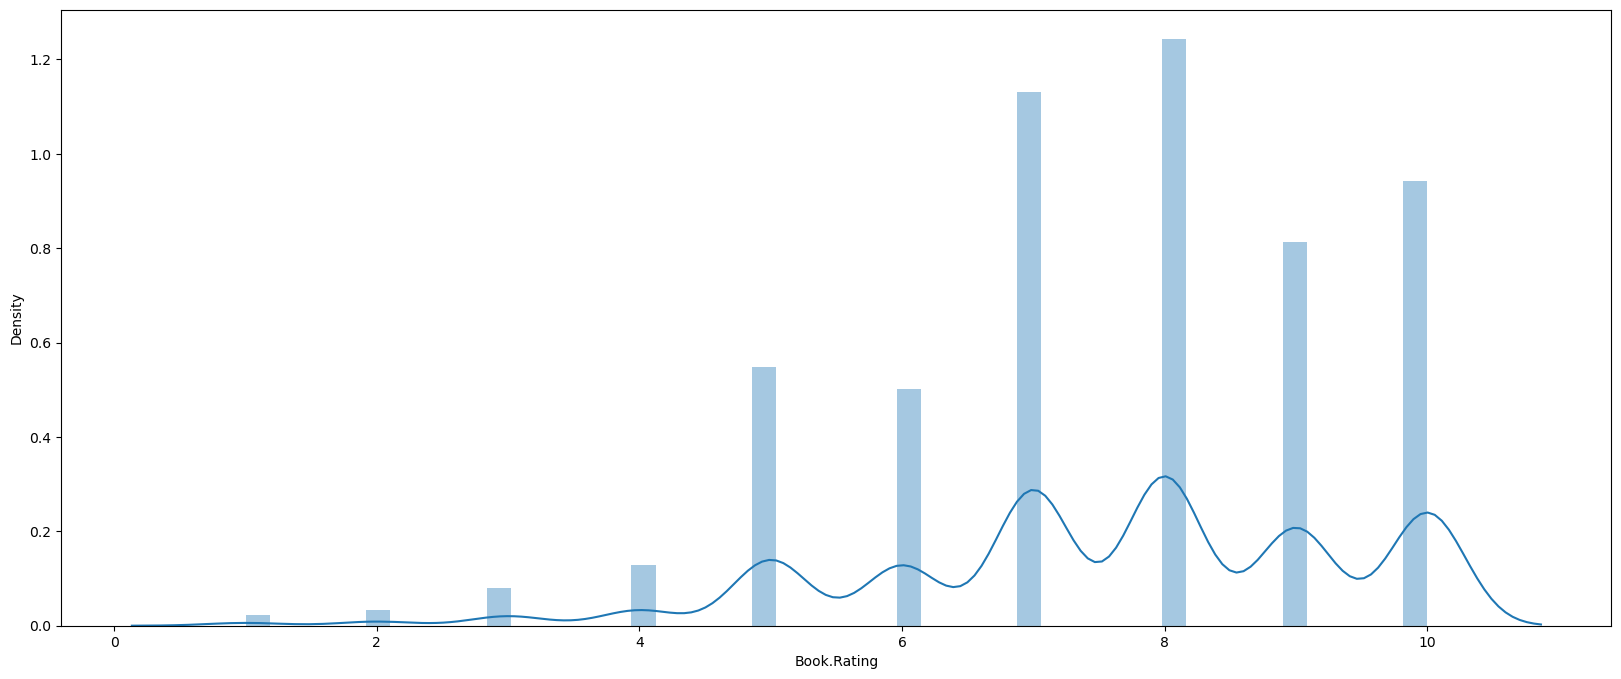

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.distplot(df["Book.Rating"])
plt.show()


In [7]:
# Clean up book titles

In [8]:
df['Book.Title'] = df['Book.Title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [9]:
df.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [10]:
df_new=df.iloc[:,1:]
df_new

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu The Story of the Great Influenza Pandemic ...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried Adventures of a Happy Eater,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt A Practical Guide,7
9998,162121,Twilight,8


In [11]:
df_new.columns

Index(['User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [12]:
df_new.shape

(10000, 3)

In [13]:
len(df_new)

10000

In [14]:
df_new.rename(columns={"User.ID":"UserID",
                   "Book.Title":"BookTitle",
                   "Book.Rating":"BookRating"},inplace=True)

In [15]:
df_new

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu The Story of the Great Influenza Pandemic ...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried Adventures of a Happy Eater,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt A Practical Guide,7
9998,162121,Twilight,8


In [16]:
len(df_new.UserID.unique())

2182

In [17]:
len(df_new.BookTitle.unique()) 

9647

In [18]:
cosin=df_new.pivot_table(index="UserID",
                   columns="BookTitle",
                   values="BookRating")

In [19]:
cosin.columns

Index([' Jason Madison ', ' Other StoriesMerril1985McClelland ',
       ' Repairing PC Drives ', '010100 A Novel of the Millennium',
       '10 Commandments Of Dating', '100 Great Fantasy Short Short Stories',
       '1001 Brilliant Ways to Checkmate',
       '101 Bright Ideas Esl Activities for All Ages', '101 Dalmatians',
       '101 Essential Tips House Plants',
       ...
       'Zits Unzipped  Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5',
       'Zlateh the Goat and Other Stories', 'Zodiac The EcoThriller', 'Zombie',
       'Zombies of the Gene Pool', 'Zoot Suit and Other Plays',
       'Zora Hurston and the Chinaberry Tree Reading Rainbow Book',
       'bermorgen', 'iI Paradiso Degli Orchi', 'stardust'],
      dtype='object', name='BookTitle', length=9647)

In [20]:
cosin.fillna(0,inplace=True)

In [21]:
cosin

BookTitle,Jason Madison,Other StoriesMerril1985McClelland,Repairing PC Drives,010100 A Novel of the Millennium,10 Commandments Of Dating,100 Great Fantasy Short Short Stories,1001 Brilliant Ways to Checkmate,101 Bright Ideas Esl Activities for All Ages,101 Dalmatians,101 Essential Tips House Plants,...,Zits Unzipped Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5,Zlateh the Goat and Other Stories,Zodiac The EcoThriller,Zombie,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree Reading Rainbow Book,bermorgen,iI Paradiso Degli Orchi,stardust
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [22]:
#calculating cosine similarity between users

In [23]:
from sklearn.metrics import pairwise_distances
metric=1-pairwise_distances(cosin.values,metric="cosine")
metric

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
np.fill_diagonal(metric,0)

In [25]:
metric

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
metric_df=pd.DataFrame(metric)

In [27]:
metric_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#set the index and columns names to user id


In [29]:
metric_df.index=df_new.UserID.unique()

In [30]:
metric_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
metric_df.columns=df_new.UserID.unique()

In [32]:
metric_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
metric_df.iloc[:5,:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [34]:
metric_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
metric_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [50]:
# extract the books which userId 276813 have watched
id1=df[df['User.ID']==276813]
id1

,Unnamed: 0,User.ID,Book.Title,Book.Rating
44,45,276813,Icebound,8
45,46,276813,Ill Be Seeing You,8
46,47,276813,From the Corner of His Eye,6
47,48,276813,Isle of Dogs,8
48,49,276813,Purity in Death,6
49,50,276813,This Year It Will Be Different And Other Stories,6
50,51,276813,Proxies,8


In [52]:
# extract the books which userId 8 have watched
id2=df[df['User.ID']==8]
id2

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2399,2400,8,Ancient Celtic Romances,5
2400,2401,8,The Western way A practical guide to the Weste...,5
2401,2402,8,Wings,5
2402,2403,8,Truckers,5
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6
2405,2406,8,The Art Of Celtia,7


In [54]:
# extract the books which userId 276813 & 8 have watched
df[(df['User.ID']==276813) | (df['User.ID']==8)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
44,45,276813,Icebound,8
45,46,276813,Ill Be Seeing You,8
46,47,276813,From the Corner of His Eye,6
47,48,276813,Isle of Dogs,8
48,49,276813,Purity in Death,6
49,50,276813,This Year It Will Be Different And Other Stories,6
50,51,276813,Proxies,8
2399,2400,8,Ancient Celtic Romances,5
2400,2401,8,The Western way A practical guide to the Weste...,5
2401,2402,8,Wings,5


In [61]:
metric_df
def get_recommendation(customer_id):
        
        tem=list(metric_df.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(df[df['User.ID'].isin(tem)]['Book.Title'])

        recommended_books = set(book_list)-set(df[df['User.ID']==customer_id]['Book.Title'])
        
        return recommended_books

In [62]:
get_recommendation(276745)

{'A Man of Steel',
 'Classical Mythology',
 'The Apprentice',
 'The Seventh Night'}